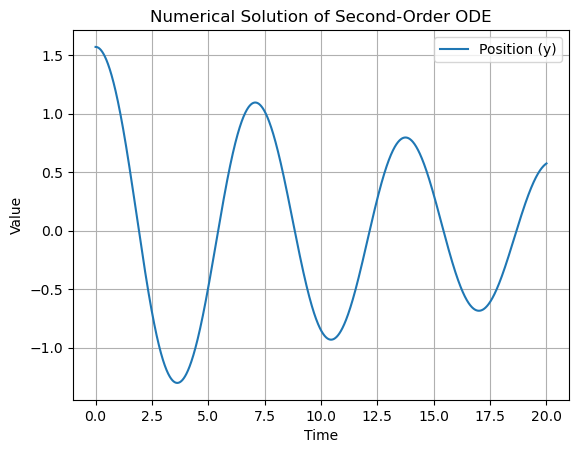

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the function f(t, y, z) for the second-order ODE
def f(t, y, z):
    # here z is the first derivative of y
    return -0.1 * z - np.sin(y)  # Example: damped pendulum

# Parameters
t0 = 0  # Initial time
tf = 20  # Final time
dt = 0.01  # Time step
y0 = np.pi / 2  # Initial position
v0 = 0  # Initial velocity

# Number of time steps
num_steps = int((tf - t0) / dt)

# Arrays to store time, position, and velocity
t_values = np.linspace(t0, tf, num_steps + 1)
y_values = np.zeros(num_steps + 1)
z_values = np.zeros(num_steps + 1)
y_values[0] = y0
z_values[0] = v0

# Euler's method for solving the system of first-order ODEs
for i in range(num_steps):
    y_prime = z_values[i]
    z_prime = f(t_values[i], y_values[i], z_values[i])
    y_values[i + 1] = y_values[i] + dt * y_prime
    z_values[i + 1] = z_values[i] + dt * z_prime

# Plot the solution
plt.plot(t_values, y_values, label='Position (y)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Numerical Solution of Second-Order ODE')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
# Downsample the data 

# Desired size of the downsampled lists
downsampled_size = 50

# Shuffle indices
shuffled_indices = list(range(len(t_values)//2)) # here we only use the first half of the data
random.shuffle(shuffled_indices)

# Select elements based on shuffled indices
downsampled_t_values = [t_values[i] for i in shuffled_indices[:downsampled_size]]
downsampled_y_values = [y_values[i] for i in shuffled_indices[:downsampled_size]]

# Add noise to the downsampled data
noise = 0.2
downsampled_y_values = [y + noise * np.random.normal() for y in downsampled_y_values]

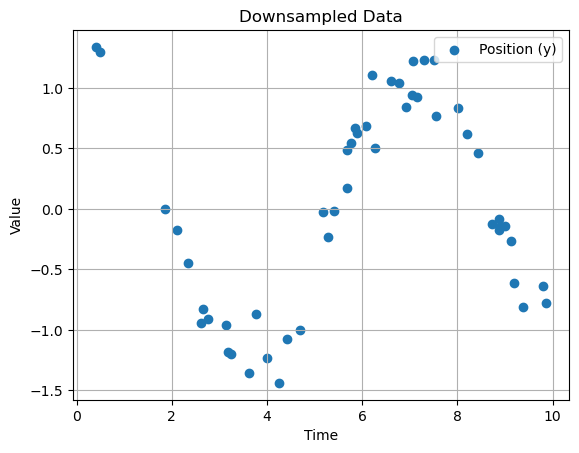

In [24]:
# plot the downsampled data
plt.scatter(downsampled_t_values, downsampled_y_values, label='Position (y)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Downsampled Data')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# save the data in a json file
import json

# save the downsampled data in a json file
data = {
    "t_values": downsampled_t_values,
    "y_values": downsampled_y_values
}

with open("testdata/oscillation_data.json", "w") as outfile:
    json.dump(data, outfile)


# save the original data in a json file
data = {
    "t_values": t_values.tolist(),
    "y_values": y_values.tolist()
}

with open("testdata/oscillation_data_original.json", "w") as outfile:
    json.dump(data, outfile)

